In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('insurance-data.csv')

In [140]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [142]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [143]:
df.isnull().sum()
#no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [144]:
df.duplicated().sum()
#one duplicate

1

In [145]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


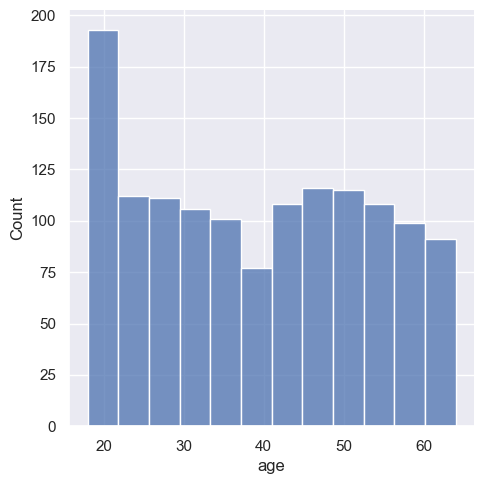

In [146]:
sns.displot(data = df, x= 'age')
print(df.age.describe())
#minimum age is 18 to be eligble for insurance
#not younger people care more for insurance

females:  662
males:  675


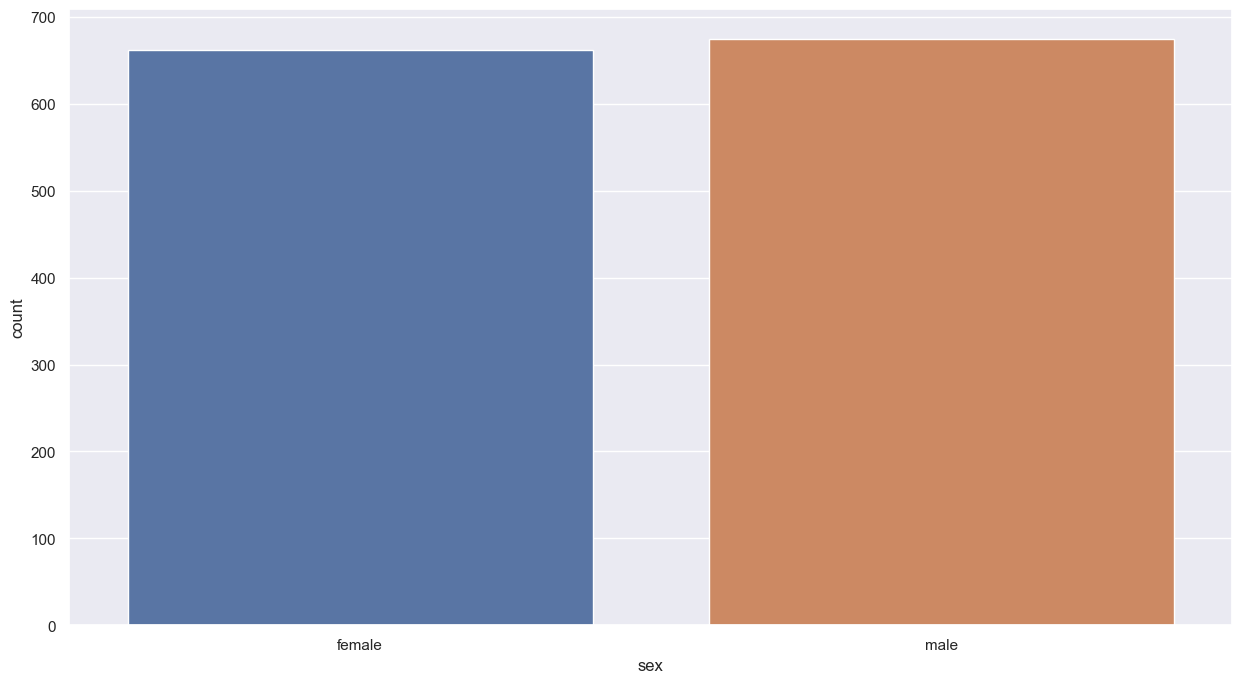

In [147]:
sns.countplot(data = df, x= 'sex')
#very close male to female ratio
print('females: ',len(df[df.sex == 'female']))
print('males: ',len(df[df.sex == 'male']))

<AxesSubplot:xlabel='region', ylabel='count'>

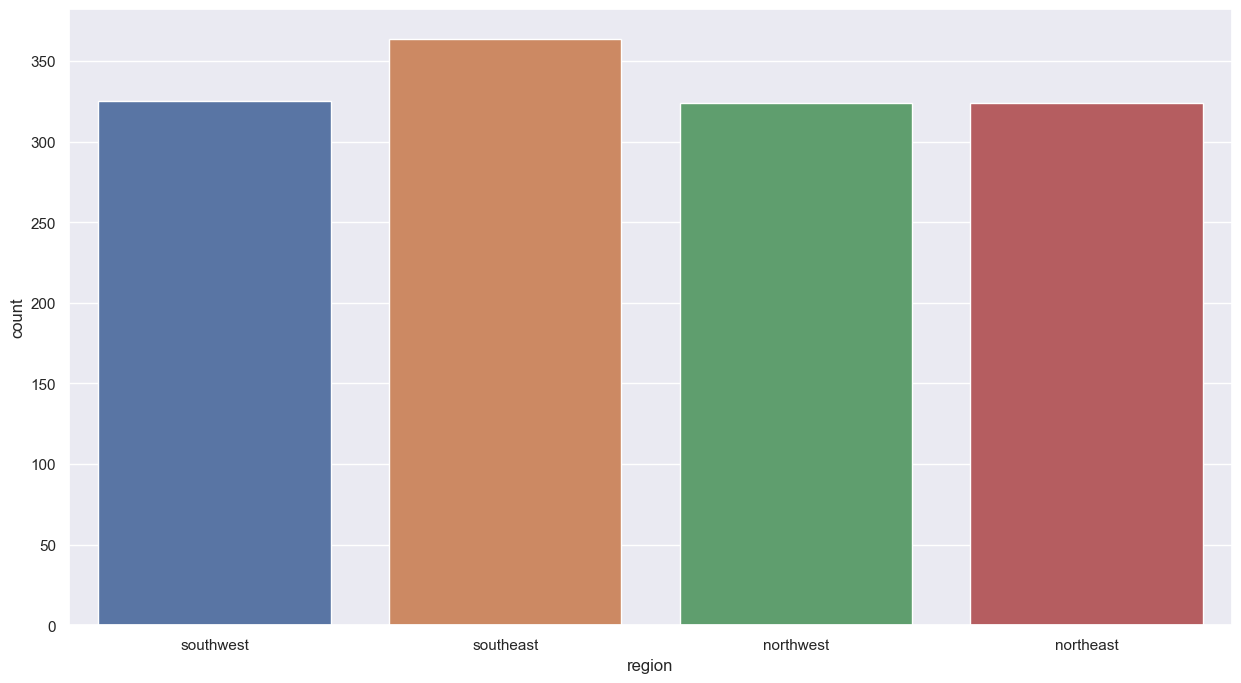

In [148]:
df.region.value_counts()
sns.countplot(data= df, x= 'region')

In [149]:
df.smoker= [0 if x =='no'else 1 for x in df.smoker]
df.smoker.value_counts()

0    1063
1     274
Name: smoker, dtype: int64

smokers:  274
non-smokers: 1063


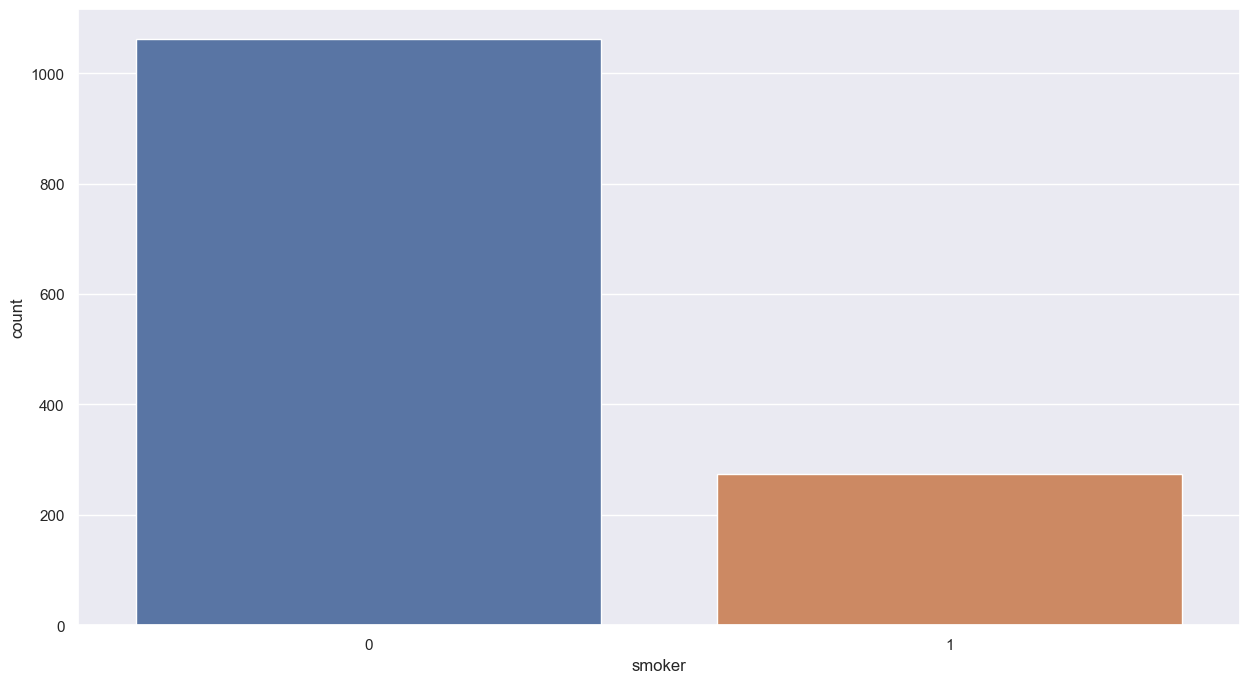

In [150]:
sns.countplot(data = df, x= 'smoker')
#smokers to non-smokers
print('smokers: ',len(df[df.smoker==1]))
print('non-smokers:', len(df[df.smoker==0]))

([<matplotlib.axis.XTick at 0x156dc9edde0>,
 [Text(1, 0, 'Males'), Text(2, 0, 'Females')])

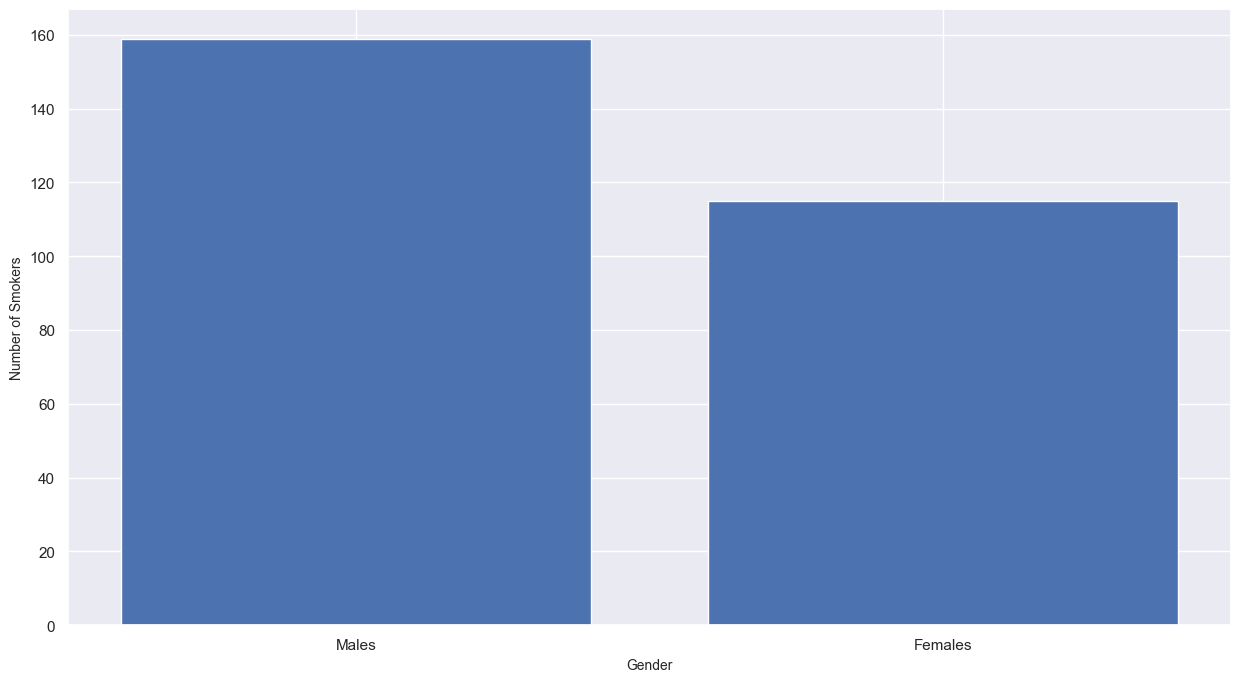

In [151]:
smokergender = [len(df[(df.smoker ==1) & (df.sex=='male')]), len(df[(df.sex == 'female') & (df.smoker==1)])]
plt.bar([1,2],smokergender)
plt.ylabel('Number of Smokers', fontsize=10)
plt.xlabel('Gender', fontsize=10)
plt.xticks([1,2], ['Males','Females'])

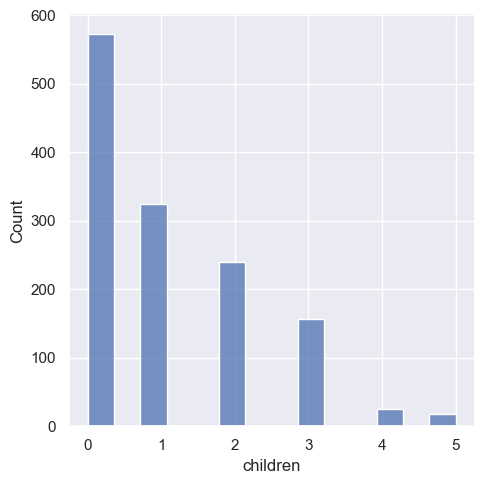

In [152]:
sns.displot(data = df, x= 'children')


([<matplotlib.axis.XTick at 0x156dd177df0>,
 [Text(1, 0, 'No children'), Text(2, 0, 'at least one child')])

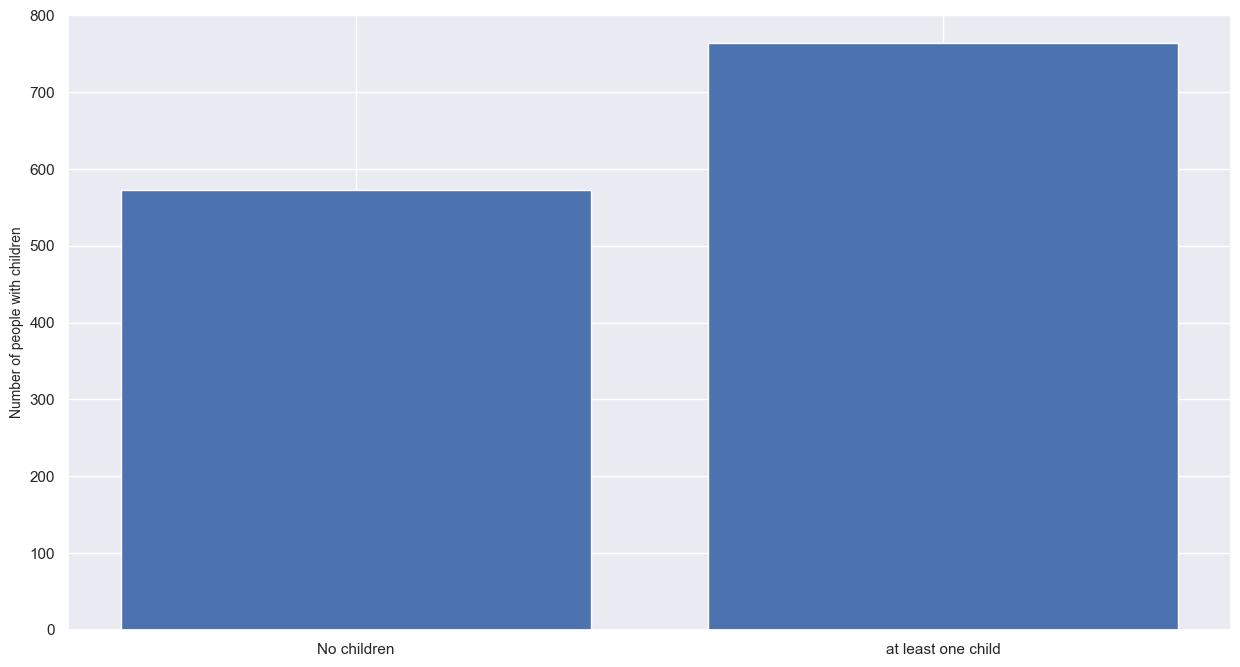

In [153]:
children = [len(df[df.children ==0]), len(df[df.children !=0])]
plt.bar([1,2],children)
plt.ylabel('Number of people with children', fontsize=10)
plt.xticks([1,2], ['No children','at least one child'])

<AxesSubplot:xlabel='age', ylabel='count'>

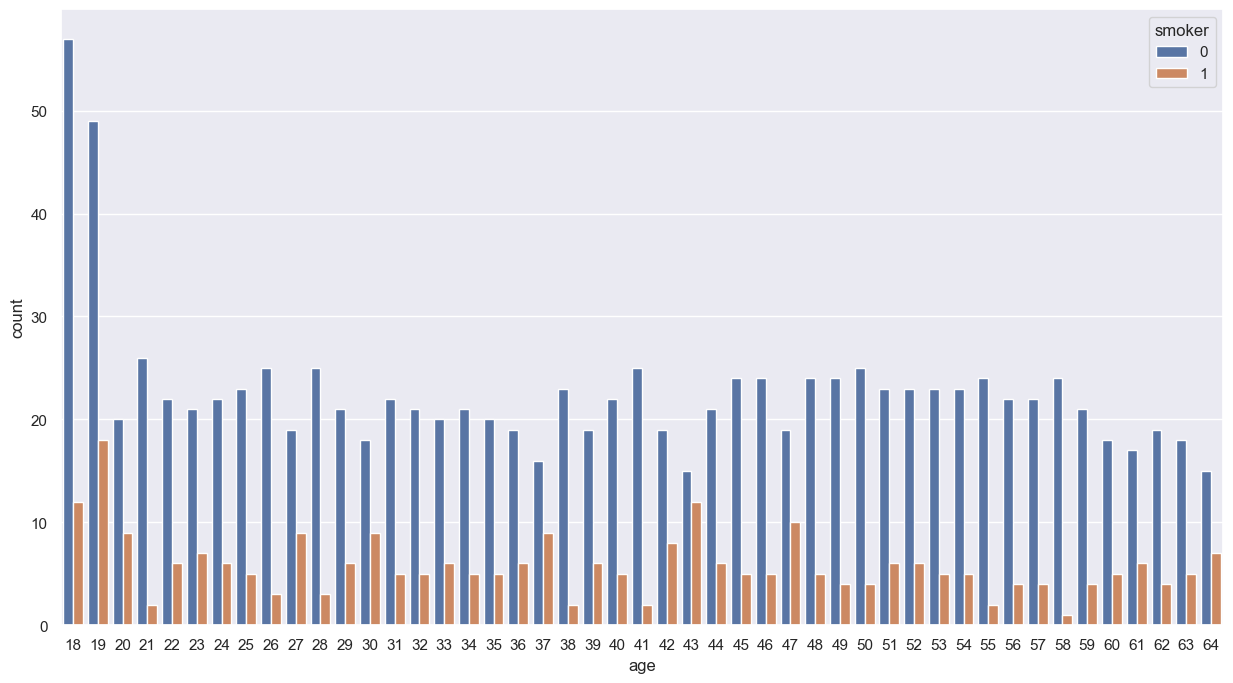

In [154]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=df,x='age' , hue ='smoker')
#19 years old are the most smoking

<AxesSubplot:xlabel='charges', ylabel='Density'>

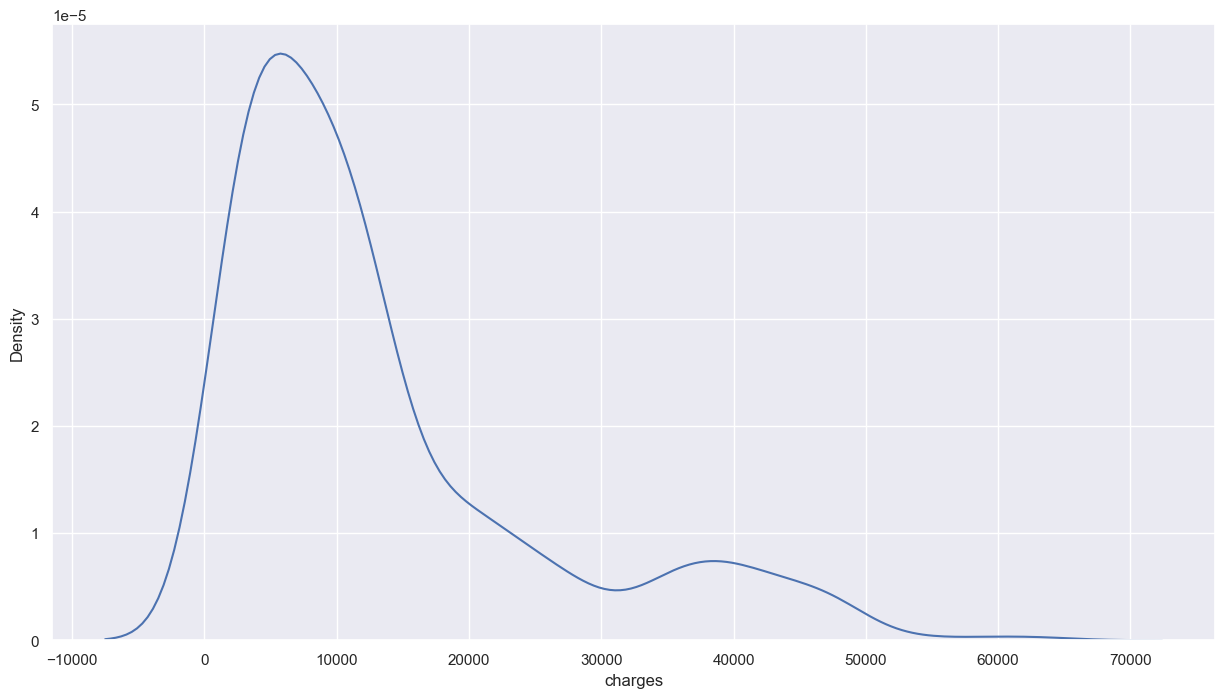

In [155]:
sns.kdeplot(data=df,x ='charges')

In [156]:
print(df[['children','charges']].corr())
print(df[['bmi','charges']].corr())
print(df[['age','charges']].corr())

          children   charges
children  1.000000  0.067389
charges   0.067389  1.000000
              bmi   charges
bmi      1.000000  0.198401
charges  0.198401  1.000000
              age   charges
age      1.000000  0.298308
charges  0.298308  1.000000


<AxesSubplot:xlabel='charges'>

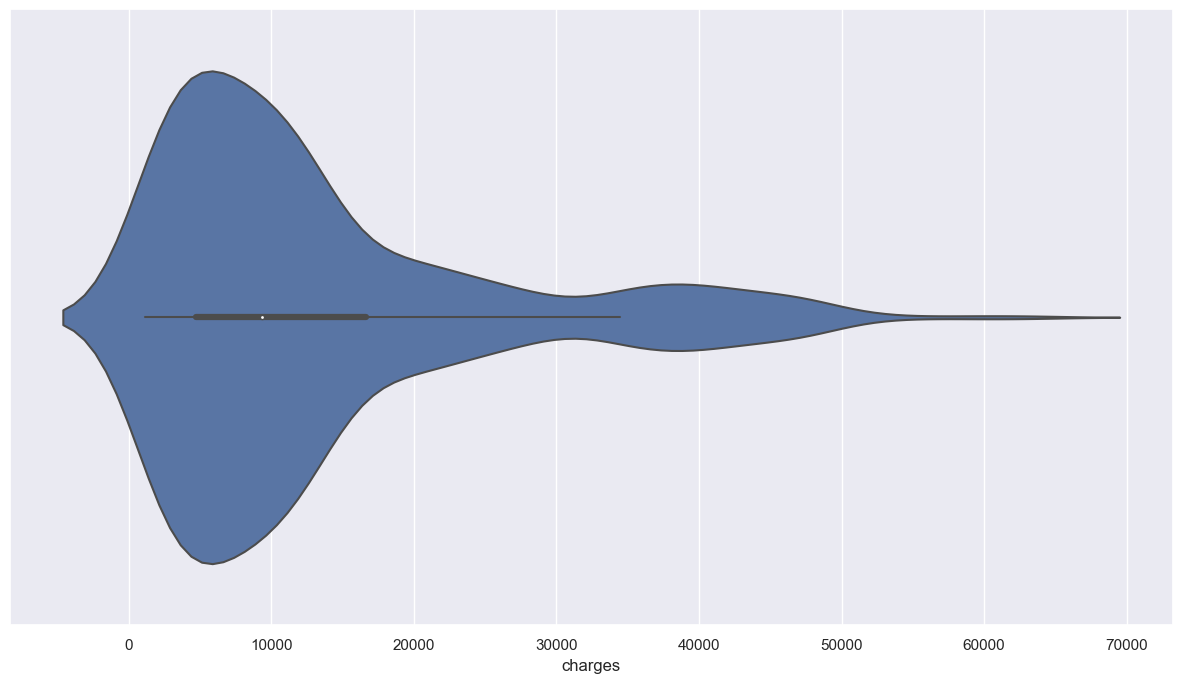

In [157]:
sns.violinplot(data=df, x='charges')